In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import pandas as pd
from sklearn.metrics import roc_curve

# Equations from Bishop

We will re-do the second part of your linear regression assignment (i.e. the replication of figure 3.8) with Gaussian processes. This  involves replacing the prediction equations (3.58 and 3.59) with the GP predictions (6.66 and 6.67):

$$m(\bold{x}_{N+1}) = \bold{k}^T\bold{C}^{-1}_N\bold{t} \tag{6.66}$$
$$\sigma^2(\bold{x}_{N+1}) = c - \bold{k}^T\bold{C}^{-1}_N\bold{k} \tag{6.67}$$

Use the Gaussian kernel

$$ k(\bold{x}, \bold{x'}) = \text{exp}(\frac{-|| \bold{x} - \bold{x'}||^2} {2\sigma^2}) \tag{6.23}$$

 to build the covariance matrix C

$$ C(\bold{x}_n, \bold{x}_m) = k(\bold{x}_n, \bold{x}_m) + \beta^{-1}\delta_{nm} \tag{6.62}$$


In [2]:
def generate_data(beta, X):
    N = len(X)
    noise = np.random.normal(0, np.sqrt(1/beta), N)
    y = np.sin(2*np.pi*X) + noise
    return y

In [193]:
def getCovarianceMatrix(X, sigma, beta, delta):
    N = len(X)
    C = np.zeros((N, N))

    for i in range(N):
        for j in range(N):
            k = np.exp((-np.absolute(X[i] - X[j])**2) / (2 * sigma)**2)
            if i == j:
                C[i, j] = k + (1/beta) * delta
            else:
                C[i, j] = k
    return C

def getParams(X, X_, t, C, sigma):
    X = X.reshape(1, -1)
    k = np.exp((-np.absolute(X.T - X_)**2) / (2 * sigma)**2)
    c = 1

    C_inv = np.linalg.inv(C)

    mN = k.T @ C_inv @ t
    SN = np.sqrt(c - np.diag(k.T @ C_inv @ k))
    # print(X.shape, X_.shape, k.shape, mN.shape, sN.shape)
    return mN, SN

In [194]:
def plotPreds(mN, SN, N, ax=None):
    if ax is None:
        ax = plt.gca()
        
    X_ = np.linspace(-1,1, 100)
    mN = mN.flatten()
    SN = SN.flatten()

    upBound = mN + SN.T
    lowBound = mN - SN.T

    ax.fill_between(X_, upBound, lowBound, facecolor = 'red', alpha=0.3, interpolate = True)
    ax.set_xlabel('Input (x)')
    ax.set_ylabel('Target (t)')
    ax.set_title(f'N = {N} Observations')

    ax.plot(X_, mN, color = 'red', label = 'Predictive Mean')
    true = np.sin(2*np.pi*X_)
    ax.plot(X_, true, color = 'green', label = 'True Function')
    ax.legend()

In [195]:
size = 100
beta = 25
alpha = 2
delta = 1
sigma = 0.1

X = np.random.uniform(-1, 1, size)
y = generate_data(beta, X)

In [196]:
C = getCovarianceMatrix(X, sigma, beta, delta)

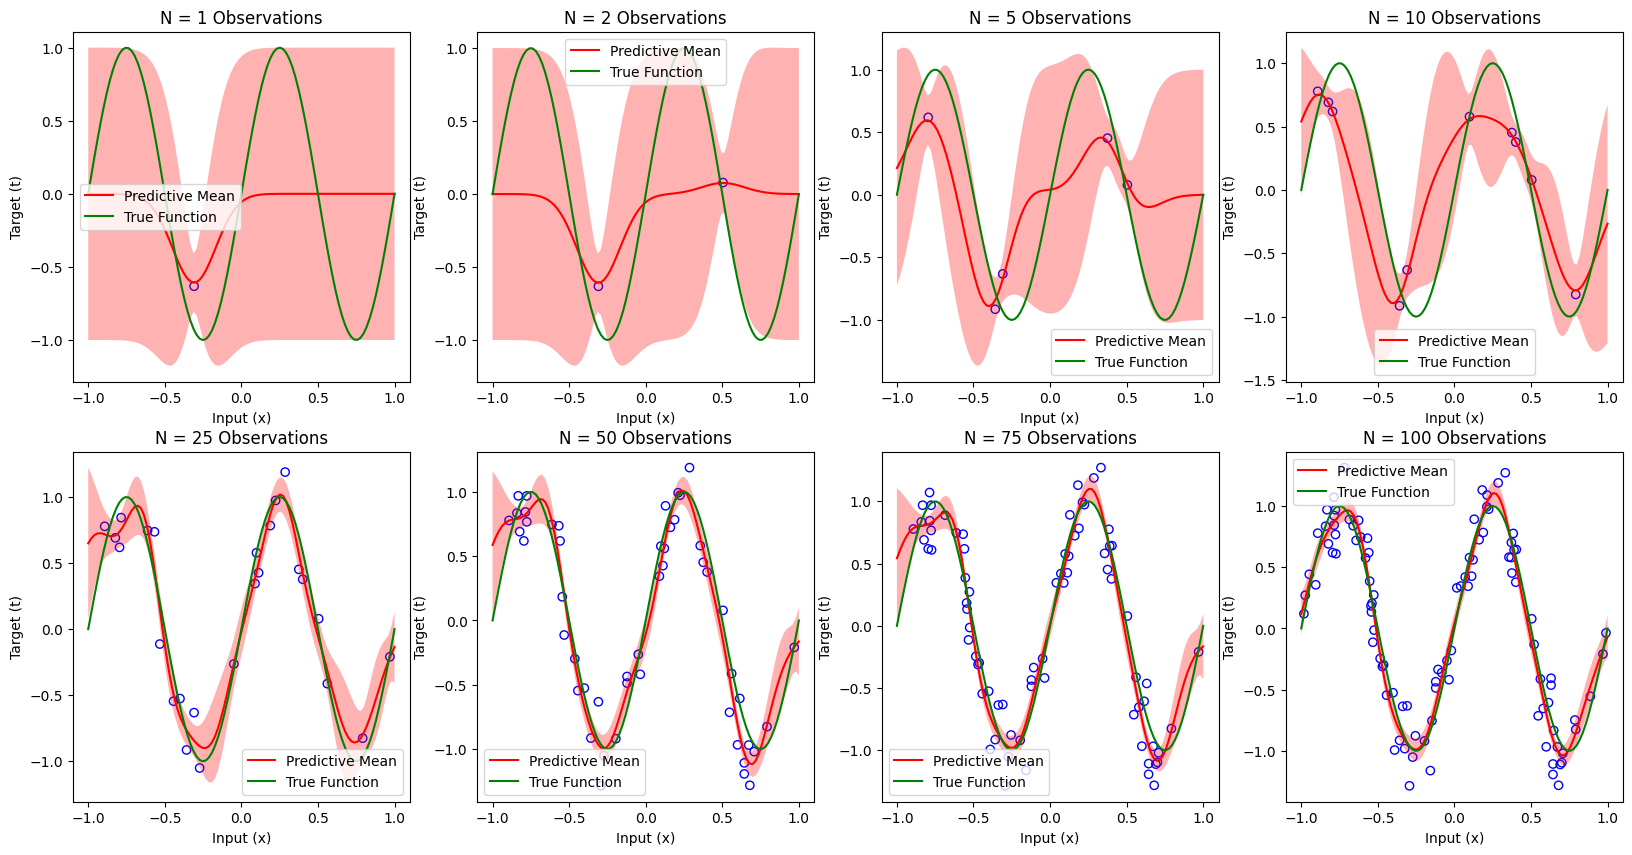

In [201]:
fig, axs = plt.subplots(2, 4, figsize=(20, 10))
axs = axs.flatten()

num_obs = [1, 2, 5, 10, 25, 50, 75, 100]
X_ = np.linspace(-1,1, 100)

for i, ax in zip(num_obs, axs):
    mN, SN = getParams(X[:i], X_, y[:i], C[:i, :i], sigma)
    ax.scatter(X[:i], y[:i], facecolors='none', edgecolors='b')
    plotPreds(mN, SN, i, ax=ax)
plt.show()